## **SHOPPING CUSTOMER SEGMENTATION PROJECT**

by 

# FrAmeS

**Problem Statement:** To understand the target customers for the marketing team to plan a strategy

In [100]:
# importing the needed libraries

import pandas as pd #for data manipulation
import matplotlib.pyplot as plt
import seaborn as sns   #for data visualization
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [101]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [102]:
data.shape

(200, 5)

In [103]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [104]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# **UNIVARIATE ANALYSIS**

In [106]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


> The distibution is a normal distribution since the mean and median (50%) are very similar

Text(0.5, 1.0, 'DISTRIBUTION OF ANNUAL INCOME')

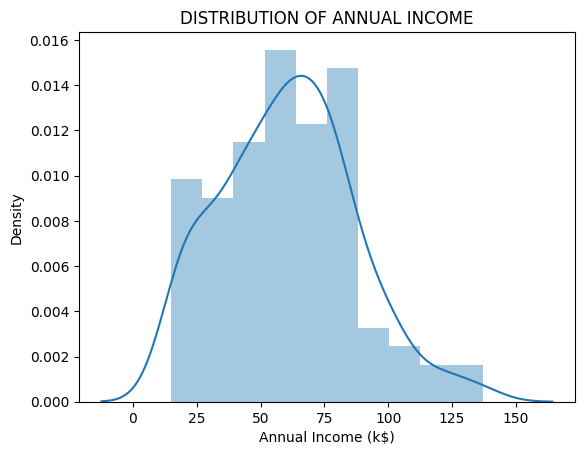

In [107]:
sns.distplot(data['Annual Income (k$)']);
plt.title('DISTRIBUTION OF ANNUAL INCOME')

In [108]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

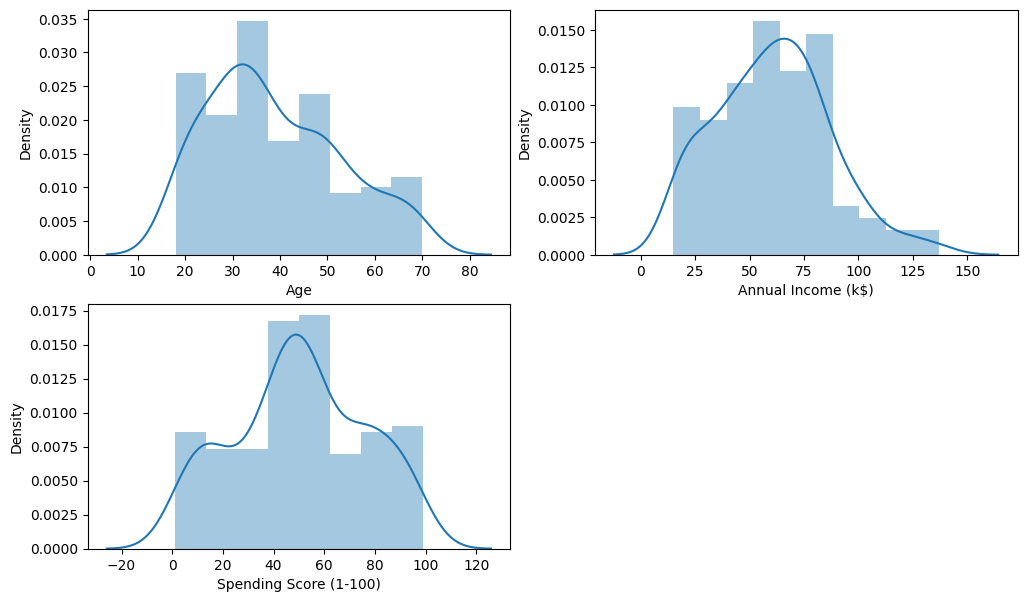

In [109]:
# plotting the density plot for numerical columns

cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# gender is an object datatype and customer ID has no effect in the analyis

plt.figure(figsize=(12, 7))

j = 0
for i in cols:
    plt.subplot(2,2, j+1)
    
    sns.distplot(data[i])
    
    j+=1


#### **VISUALIZATION WRT TO DIMENSION(GENDER)**

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

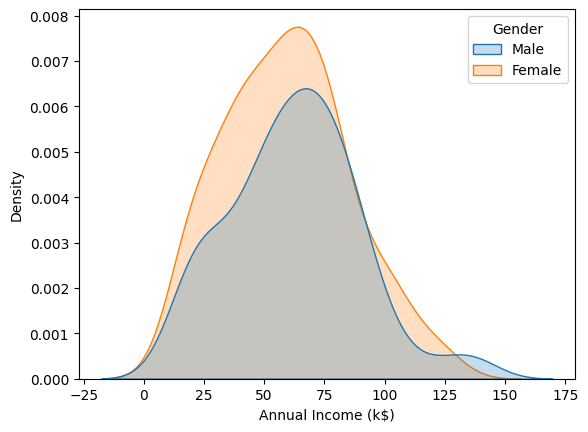

In [110]:
sns.kdeplot(data['Annual Income (k$)'], shade=True, hue=data['Gender'])

> * The distribution shows that the customers have a higher number of women with a mid range annual income
> * There is an outlier among the male annual income

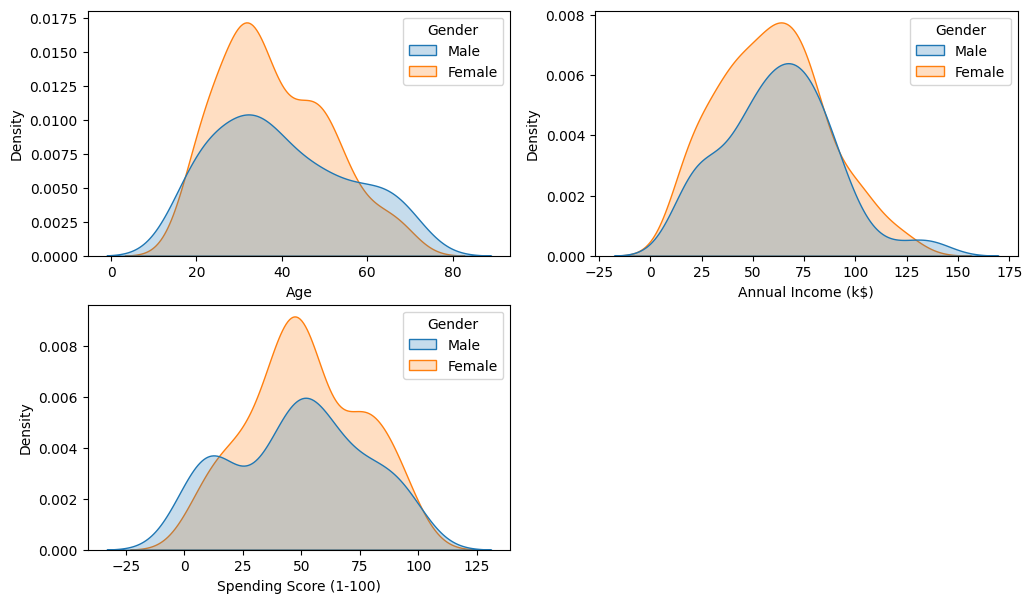

In [111]:
# plotting the kdeplot for numerical columns

plt.figure(figsize=(12, 7))

j = 0
for i in cols:
    plt.subplot(2,2, j+1)
    
    sns.kdeplot(data[i], shade=True, hue=data['Gender'])
    
    j+=1

INFERENCE

> * The major customers are mostly middle aged women between 25 and 45 years
> * On an average, women have a higher spending score and a slightly higher annual income than the male gender

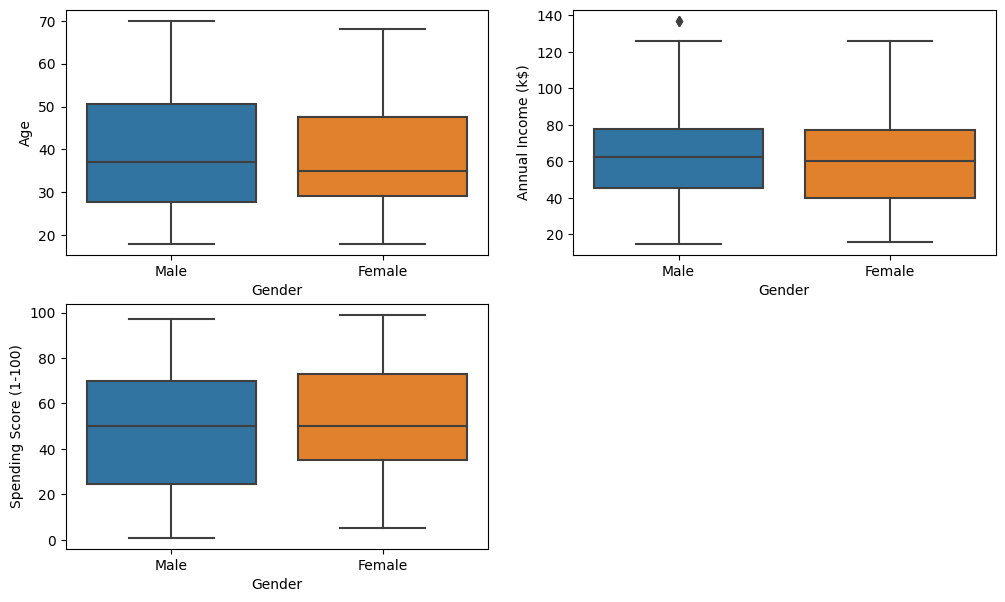

In [112]:
# plotting the boxplot for numerical columns

plt.figure(figsize=(12, 7))

j = 0
for i in cols:
    plt.subplot(2,2, j+1)
    
    sns.boxplot(data = data,x='Gender', y=i)
    
    j+=1

The boxplot for Annual income validates the presence of an outlier among the male data

**GENDER DISTRIBUTION**

Text(0.5, 1.0, 'GENDER DISTRIBUTION')

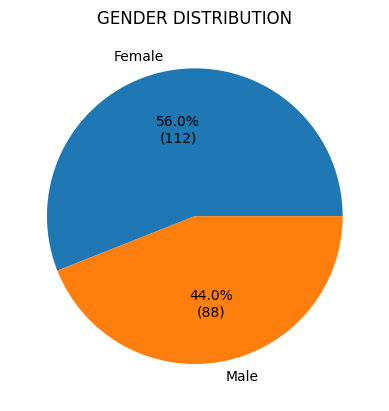

In [113]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = data['Gender'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s));
plt.title('GENDER DISTRIBUTION')

This distribution shows that the mall receives a bit more female customers than male

## **BIVARIATE ANALYSIS**

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

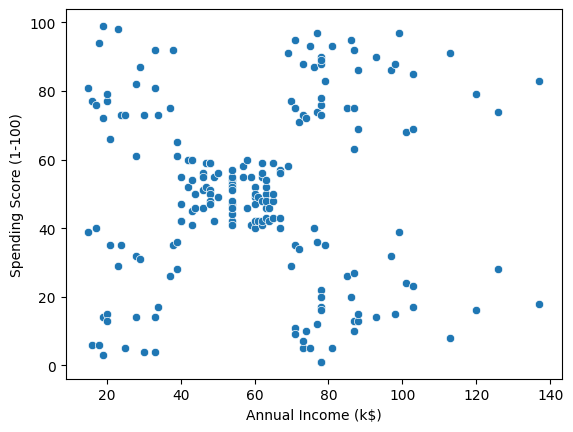

In [114]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)')

> * this shows their are 5 clusters wrt to the spending score and annual income

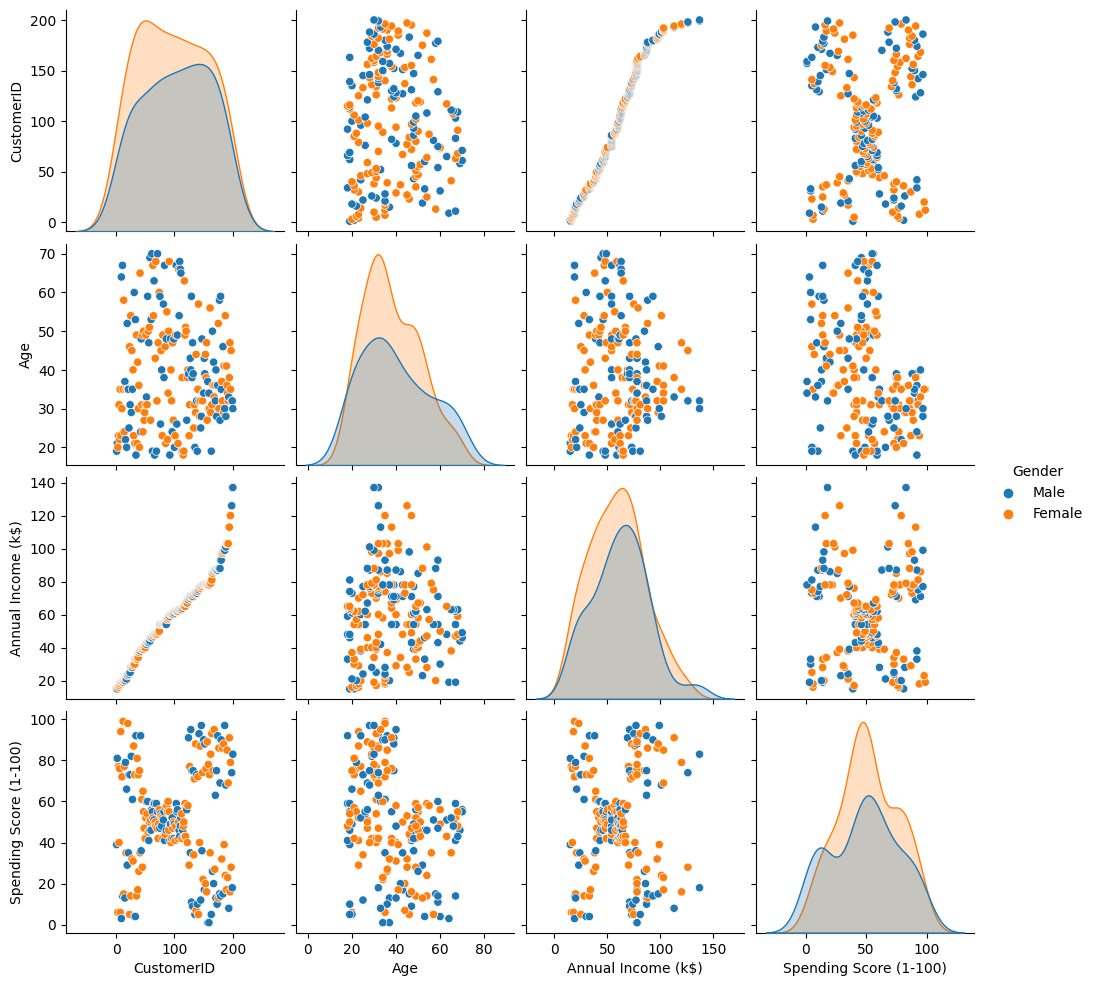

In [115]:
#data = data.drop('CustomerID', axis=1)
sns.pairplot(data, hue='Gender')

In [116]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [117]:
data.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<AxesSubplot:>

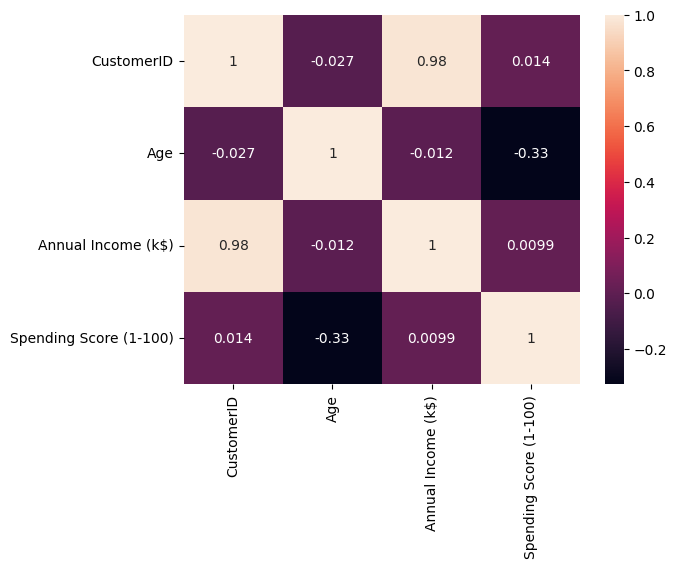

In [118]:
sns.heatmap(data.corr(), annot=True)

## **CLUSTERING- UNIVARIATE, BIVARIATE, MULTIVARIATE**

> * The defualt cluster for KMeans is 8. this will be optimized to get the actual number of cluster in the dataset
> * The cluster instance fits only to a dataframe

In [119]:
cluster = KMeans() #Instantiation

In [120]:
cluster.fit(data[['Annual Income (k$)']]) #fitting

KMeans()

In [121]:
cluster.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7,
       7, 7])

this shows he distribution among the 8 clusters (0-7)

> To get an optimized number of clusters for the Annual Income, the **ELBOW** techniques is used. Here, a line plot of the cluster inertia against a range of values is generated. The point at which the elbow curve starts gives the optimized number of cluster to be used

---

In [123]:
cluster.inertia_

2831.2960317460347

In [124]:
inertia = []
for i in range(1 ,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data[['Annual Income (k$)']])
    
    inertia.append(kmeans.inertia_)

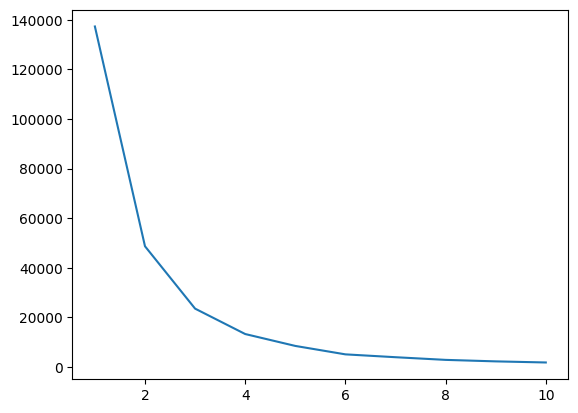

In [125]:
plt.plot(range(1, 11), inertia)

We can visualize that the elbow starts at 3 on the x-axis. Hence 3 is the optimal number of clusters

In [126]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [127]:
cluster1 = KMeans(n_clusters=3)
cluster1.fit(data[['Annual Income (k$)']])
cluster1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [129]:
data['Income_cluster'] = cluster1.labels_
data['Income_cluster'].value_counts()

1    92
0    72
2    36
Name: Income_cluster, dtype: int64